In [ ]:
# 데이터 확인
import csv

with open('data-files/subway-data.csv', encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    for idx, row in enumerate(reader):
        print(row)
        if idx == 5:
            break;

In [ ]:
# map 함수 사용
import csv

with open('data-files/subway-data.csv', encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    for idx, row in enumerate(reader):
        #print(row[4:])
        #changed = map(int, row[4:-1]) # map(변환함수, 데이터)   -> input == output 
        #changed = map(lambda x: int(x.replace(',',"")),      
        #              row[4:-1])
        #changed = [int(x.replace(',',"")) for x in row[4:-1]]
        row[4:-1] = map(lambda x: int(x.replace(',',"")),
                        row[4:-1])
        
        print(len(row[4:-1]))
        print(row[4:-1])
        if idx == 5:
            break;

In [ ]:
# 역 별 7시 승차인원 합계

import csv

with open('data-files/subway-data.csv', encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {}
    
    for row in reader:
        #4 : 4
        #7 : 10 -> (7 - 4)*2 + 4
        hour = 7
        idx = (hour - 4)*2 + 4  # 승차
        #idx = (hour - 4)*2 + 5  # 하차
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        
        if row[3] in cnt_by_station:    # 역 이름이 중복되면 추가한다.
            prev_data = cnt_by_station[row[3]]    # 역 명
            cnt_by_station[row[3]] = prev_data + row[idx] # row[10] = 7시 데이터
            
        else:
            cnt_by_station[row[3]] = row[idx]
            
sorted_cnt_by_station = sorted(cnt_by_station.items(), \
                               key=lambda kv : kv[1],\
                               reverse = True) 

print(sorted_cnt_by_station)

In [14]:
import csv

with open('data-files/subway-data.csv', encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {}
    
    for row in reader:
        #4 : 4
        #7 : 10 -> (7 - 4)*2 + 4
        hour = 7
        idx = (hour - 4)*2 + 4  # 승차
        #idx = (hour - 4)*2 + 5  # 하차
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        cnt = sum(row[idx : idx + 2 * 2 : 2])  #  idx + 2 = 8시 까지 보고 싶을 경우.
        
        if row[3] in cnt_by_station:    # 역 이름이 중복되면 추가한다.
            prev_data = cnt_by_station[row[3]]    # 역 명
            cnt_by_station[row[3]] = prev_data + cnt         
        else:
            cnt_by_station[row[3]] = cnt
            
sorted_cnt_by_station = sorted(cnt_by_station.items(), \
                               key=lambda kv : kv[1],\
                               reverse = True) 

## list는 맞으나 sorted_cnt_by_station의 값의 목록임.

print(sorted_cnt_by_station[:10])

[('신림', 459731), ('사당', 287375), ('구로디지털단지', 286628), ('서울대입구(관악구청)', 274229), ('연신내', 264235), ('잠실(송파구청)', 258152), ('신도림', 257227), ('까치산', 247338), ('쌍문', 231201), ('화곡', 229214)]


In [8]:
#type(sorted_cnt_by_station)
len(sorted_cnt_by_station)

510

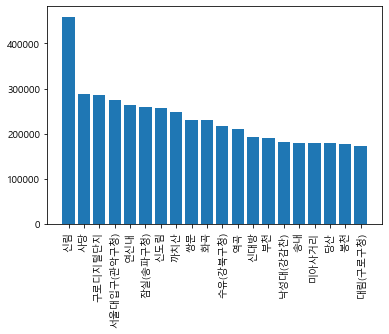

In [9]:
import matplotlib.pyplot as plt

cnt_list = list(dict(sorted_cnt_by_station).values())
stations = list(dict(sorted_cnt_by_station).keys())
#plt.bar(range(len(sorted_cnt_by_station)),cnt_list, width = 3)
#plt.plot(cnt_list)
#plt.bar(range(len(cnt_list[:20])), cnt_list[:20])
plt.rc('font', family="Malgun Gothic") # 지원가능한 폰트로 변경. '맑은 고딕'
plt.bar(range(20), cnt_list[:20])
plt.xticks(range(20), stations[:20], rotation = 90)  # x값에 역 이름 부여, 
plt.show()

In [12]:
#23시 하차인원 합계

import csv

with open('data-files/subway-data.csv', encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {}
    
    for row in reader:
        #4 : 4
        #7 : 10 -> (7 - 4)*2 + 4
        hour = 23
        idx = (hour - 4)*2 + 4  # 승차
        #idx = (hour - 4)*2 + 5  # 하차
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        cnt = sum(row[idx : idx + 2 * 2 : 2])  #  idx + 2 = 8시 까지 보고 싶을 경우.
        
        if row[3] in cnt_by_station:    # 역 이름이 중복되면 추가한다.
            prev_data = cnt_by_station[row[3]]    # 역 명
            cnt_by_station[row[3]] = prev_data + cnt         
        else:
            cnt_by_station[row[3]] = cnt
            
sorted_cnt_by_station = sorted(cnt_by_station.items(), \
                               key=lambda kv : kv[1],\
                               reverse = True) 

## list는 맞으나 sorted_cnt_by_station의 값의 목록임.

print(sorted_cnt_by_station[:10])

[('강남', 61556), ('홍대입구', 57681), ('건대입구', 43752), ('사당', 38980), ('합정', 34103), ('고속터미널', 31783), ('잠실(송파구청)', 31416), ('왕십리(성동구청)', 28563), ('종로3가', 26806), ('서울역', 26294)]


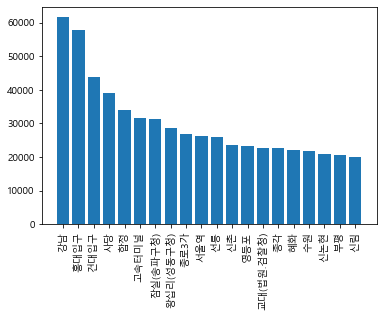

In [13]:
import matplotlib.pyplot as plt

cnt_list = list(dict(sorted_cnt_by_station).values())
stations = list(dict(sorted_cnt_by_station).keys())
#plt.bar(range(len(sorted_cnt_by_station)),cnt_list, width = 3)
#plt.plot(cnt_list)
#plt.bar(range(len(cnt_list[:20])), cnt_list[:20])
plt.rc('font', family="Malgun Gothic") # 지원가능한 폰트로 변경. '맑은 고딕'
plt.bar(range(20), cnt_list[:20])
plt.xticks(range(20), stations[:20], rotation = 90)  # x값에 역 이름 부여, 
plt.show()

In [15]:
def add_list_by_element(list1, list2): 
    #add_list_by_elemen : 값1(Ture일때 값.) if 조건식 eles 값2(False일때 값)        /2개의 리스트를 받아서
    l, s = (list1, list2) if len(list1) >= len(list2) \
                            else (list2, list1)                    #2개의 리스트중 누가더 긴지 확인 해서 긴건 l에 해당. 짧은것 s
                         

    result = l.copy()                                          # 긴 리스트 복사해 가져와
    for idx, e in enumerate(s):                               #짧은 리스트 반복해서 합을 구함. (빈 곳은 0으로 진행.)
            result[idx] = s[idx] + l[idx]
            
    return result

In [35]:
# 시간대별 승하차 최대 역 & 승객수 

import csv

with open('data-files/subway-data.csv', encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_station = {}     # dict
    
    for row in reader:
        hour = 4
        idx = (hour - 4)* 2 + 4  # 승차
        #idx = (hour - 4)* 2 + 5  # 하차
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        
        cnts = []
        for h in range(24):     # idx부터 시작해서 h에 (0)부터 시작해 23까지 하나씩 더해주면서 보면 된다,.
            cnt = row[idx + h * 2] + row[idx + h * 2 + 1 ]   #매 시간별 row[idx + h * 2] = 승차인원 / row[idx + h * 2 + 1 ] = 하차인원
            cnts.append(cnt)
            
        if row[3] in cnt_by_station:    # 역 이름이 중복되면 추가한다.
            prev_data = cnt_by_station[row[3]]    # 역 명
            cnt_by_station[row[3]] = add_list_by_element(prev_data, cnts)         
        else:
            cnt_by_station[row[3]] = cnts

# print(len(list(cnt_by_station.items())[0][1]))            
# list(cnt_by_station.items())[0]

top_one_by_hour = []    

for idx in range(24):
    sorted_by_h = sorted(cnt_by_station.items(),  #cnt_by_station.items ->list 로 만들어 진다.
                         key=lambda kv : kv[1][idx],
                         reverse = True)
#      top_one_by_hour.append(sorted_by_h[0])
    top_one_by_hour.append((sorted_by_h[0][0], sorted_by_h[0][1][idx]))   # 튜플로 묶어 줘야 함.
    
print(top_one_by_hour[23])
top_one_by_hour
    

('서울역', 0)


[('구로', 10144),
 ('대림(구로구청)', 47618),
 ('신림', 91277),
 ('여의도', 230500),
 ('가산디지털단지', 504381),
 ('강남', 349390),
 ('고속터미널', 190788),
 ('고속터미널', 211399),
 ('고속터미널', 220433),
 ('고속터미널', 238698),
 ('고속터미널', 247239),
 ('고속터미널', 268926),
 ('고속터미널', 283936),
 ('강남', 334172),
 ('강남', 493832),
 ('강남', 318571),
 ('잠실(송파구청)', 240739),
 ('강남', 220906),
 ('강남', 212904),
 ('신림', 102725),
 ('신도림', 15097),
 ('인천', 7),
 ('신당', 2),
 ('서울역', 0)]

In [31]:
a = [ 4, 7, 1, 9, 5 ,2]
# sorted(a)
sorted(a, key=lambda kv: kv)

b = [(4, 10), (7, 45), (1, 30), (9, 66), (5, 12), (2, 45)]
sorted(b, key=lambda kv : kv[1])    #kv[0] = 첫번째 숫자 기준으로 정렬, kv[1] = 두번째 숫자 기준으로 정렬. key는 어느 위치에 있는걸 기중으로 비교 할 것인지 주는것.

[(4, 10), (5, 12), (1, 30), (7, 45), (2, 45), (9, 66)]

In [41]:
#시간대별(key) 승차/ 하차 승객수(values)

import csv

with open('data-files/subway-data.csv', encoding = "utf-8") as f:
    reader = csv.reader(f)
    next(reader)
    next(reader)
    
    cnt_by_hour = {}     # dict    key를 dict으로 처리하는게 정석.
    
    for row in reader:
        hour = 4
        idx = (hour - 4)* 2 + 4  # 승차
        row[4:-1] = map(lambda x: int(x.replace(',',"")),row[4:-1])
        
        cnts = []
        for h in range(24):# idx부터 시작해서 h에 (0)부터 시작해 23까지 하나씩 더해주면서 보면 된다,.
            cnt = [row[idx + h * 2] , row[idx + h * 2 + 1 ]]   # idx = 시간 / 매 시간별 row[idx + h * 2] = 승차인원 / row[idx + h * 2 + 1 ] = 하차인원
            if h in cnt_by_hour:
                prev_data = cnt_by_hour[h]
                new_data = add_list_by_element(prev_data, cnt)
                cnt_by_hour[h] = new_data
            else:              
                cnt_by_hour[h] = cnt
#print(cnt_by_hour)   # 0번이 4시 부터 승하차 

sorted_cnt_by_hour = sorted(cnt_by_hour.items(), 
                            key=lambda kv: kv[1][0]+kv[1][1], reverse=True) #승하차 합한 값중 가장 많이 이용하는 시간대 
sorted_cnt_by_hour

[(14, [17965005, 16489387]),
 (4, [15257337, 18094697]),
 (13, [13278794, 11257355]),
 (15, [9850784, 13620575]),
 (5, [9383341, 11885809]),
 (3, [13222919, 7884852]),
 (12, [9970996, 8981738]),
 (11, [8689880, 8214553]),
 (9, [7937772, 7888863]),
 (10, [7960799, 7840074]),
 (16, [7539696, 8179318]),
 (8, [7508286, 7193539]),
 (6, [6867525, 7413014]),
 (17, [6865561, 7076573]),
 (7, [6884571, 6869507]),
 (18, [5626715, 6371986]),
 (2, [5313295, 3645705]),
 (19, [2090385, 4255486]),
 (1, [2735202, 722627]),
 (20, [36842, 644821]),
 (0, [114714, 1414]),
 (21, [22, 62]),
 (22, [9, 15]),
 (23, [0, 0])]